# Q2: High Dimensional Gaussians

## Distance of Gaussian samples from origin

if we have $x = [x_1, x_2, ..., x_d]^T$ then:<br/>

$$\text{Euclidean dist.} = \text{Euclidean distance} = \sqrt{\sum_{i=1}^{d}(x_i - 0) ^2)} = \sqrt{\sum_{i=1}^{d}x_i ^2} = x^Tx$$

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi

## Distribution of distances of Gaussian samples from origin

In [180]:
def norm(x):
    return x.dot(x) ** 0.5

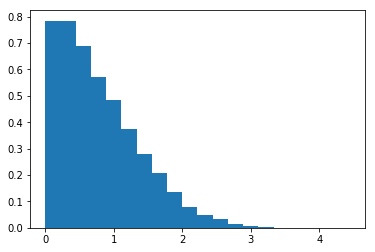

In [183]:
V = np.random.randn(10000, 1)
dists = [norm(x) for x in V]
plt.hist(dists, density=True, bins=20)
plt.show()

**Does this confirm your intuition that the samples will be near the origin?**

As seen above, The first bin is higher than the others which is completely congruent with my intuition that most of the samples should be close to 0. (as the pdf is larger for them samples and they are more probable to be drawn). 

## Plot samples from distribution of distances

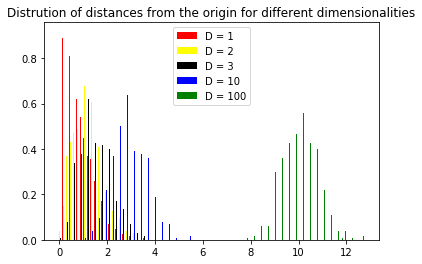

In [207]:
V = [np.random.randn(10000, d) for d in [1, 2, 3, 10, 100]]

dists = np.array([[norm(x) for x in v] for v in V])

colors = ['red', 'yellow', 'black', 'blue', 'green']

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.title('Distrution of distances from the origin for different dimensionalities')
plt.legend()
plt.show()

**As the dimensionality of the Gaussian increases, what can you say about the expected distance of the samples from the Gaussian's mean (in this case, origin)?**

The expected distance from origin increases as d increseas.

## Plot samples from distribution of distances

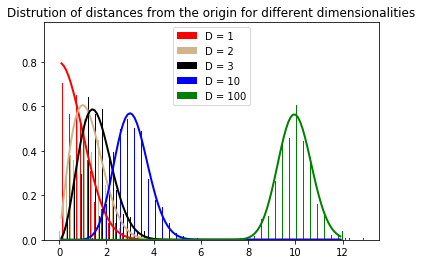

In [205]:
import scipy.stats as stats

V = [np.random.randn(10000, d) for d in [1, 2, 3, 10, 100]]

dists = np.array([[norm(x) for x in v] for v in V])

colors = ['red', 'tan', 'black', 'blue', 'green']

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.title('Distrution of distances from the origin for different dimensionalities')
plt.legend()

x = np.arange(0.1, 12, 0.1)
plt.plot(x, stats.chi.pdf(x, df=1), color='red', lw=2)
plt.plot(x, stats.chi.pdf(x, df=2), color='tan', lw=2)
plt.plot(x, stats.chi.pdf(x, df=3), color='black', lw=2)
plt.plot(x, stats.chi.pdf(x, df=10), color='blue', lw=2)
plt.plot(x, stats.chi.pdf(x, df=100), color='green', lw=2)

stats.chi2.pdf(x, df=3)

plt.show()

## Distribution of distance between samples

**Taking two samples from the $D$-dimensional unit Gaussian, $x_a, x_b \sim \mathcal{N}(  0_D, I_D)$ how is $x_a -  x_b$ distributed?**

The difference $x_a - x_b$ is another D-dimensional Gaussian $\mathcal{N}(0_D, \sqrt{2}I_D)$
.

Using the change of variables formula we have:

In [202]:
D = [1, 2, 3, 10, 100]

sample_1 = [np.random.randn(1000, d) for d in D]
sample_2 = [np.random.randn(1000, d) for d in D]

dists = np.array([[norm(x1 - x2) for x1, x2 in zip(s1, s2)] 
                  for s1, s2 in zip(sample_1, sample_2)])

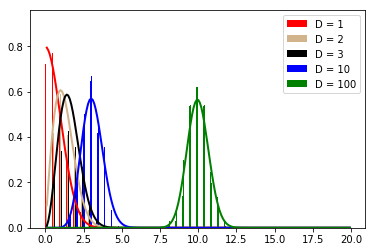

In [209]:
colors = ['red', 'tan', 'black', 'blue', 'green']

x = np.arange(0.1, 20, 0.1)

for i, d in enumerate(D):
    plt.plot(x, stats.chi.pdf(x, df=d), color=colors[i], lw=2)

plt.hist(dists.T, density=True, color=colors, label=['D = 1', 'D = 2', 'D = 3', 
                                                     'D = 10', 'D = 100'], bins=1000)
plt.legend()
plt.show()

## Linear and Polar Interpolation Between Samples

In [69]:
from math import pi

In [146]:
lin_interp = lambda alpha, x_a, x_b: alpha * x_a + (1 - alpha) * x_b
polar_interp = lambda alpha, x_a, x_b: alpha**0.5 * x_a + (1 - alpha)**0.5 * x_b


def ll_norm_stable(x):
    """
    stable log likelihood implementation of unit Gaussian distribution...
    """
    d = x.shape[0]
    
    return d * (-0.5 * np.log(2 * pi)) - 1/2 * np.sum(x ** 2)

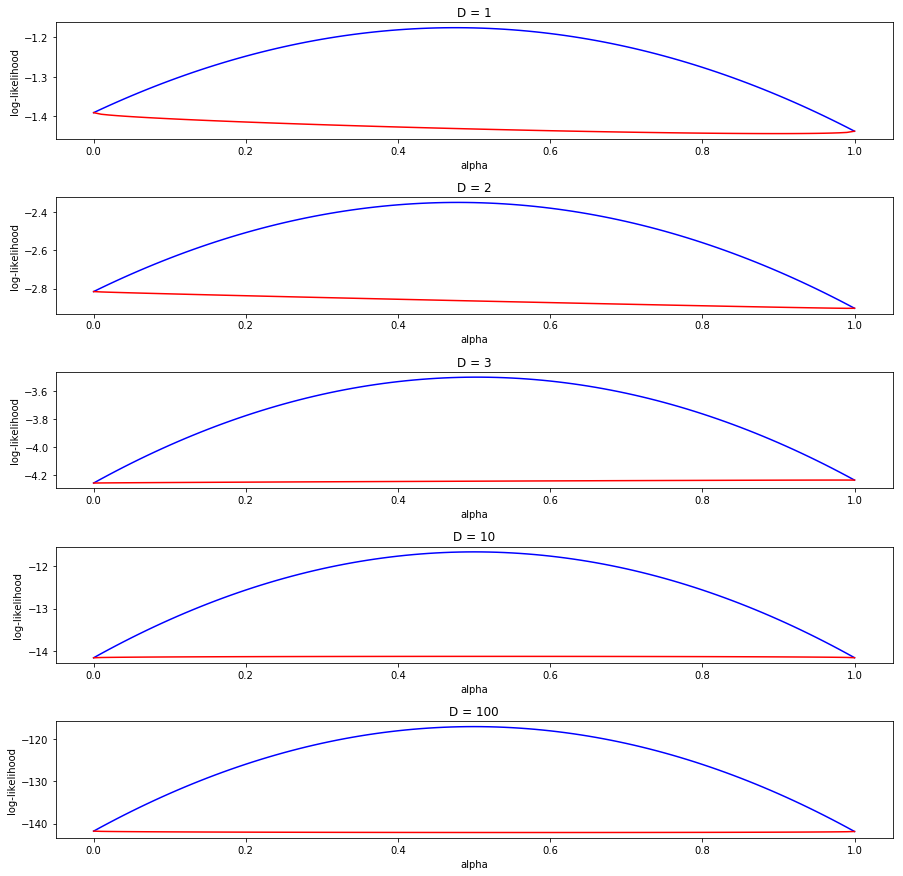

In [216]:
D = [1, 2, 3, 10, 100]

fig, axs = plt.subplots(5, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i, d in enumerate(D):
    sample_1 = np.random.randn(1000, d)
    sample_2 = np.random.randn(1000, d)

    avg_ll_linear = np.zeros(101, dtype=np.float64)
    avg_ll_polar = np.zeros(101, dtype=np.float64)

    for j, alpha in enumerate(np.linspace(0, 1, num=101)):
        avg_ll_linear[j] = np.mean([ll_norm_stable(lin_interp(alpha, x1, x2)) 
                                    for x1, x2 in zip(sample_1, sample_2)])
        avg_ll_polar[j] = np.mean([ll_norm_stable(polar_interp(alpha, x1, x2)) 
                                    for x1, x2 in zip(sample_1, sample_2)])
            
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_linear, color='b')
    axs[i].set_title(f'D = {d}')
    axs[i].set_xlabel('alpha')
    axs[i].set_ylabel('log-likelihood')
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_polar, color='r')

**Is a higher log-likelihood for the interpolated points necessarily better? Given this, is it a good idea to linearly interpolate between samples from a high dimensional Gaussian?**<br/>

**Comment on the log-likelihood under the unit Gaussian of points along the polar interpolation. Give an intuitive explanation for why polar interpolation is more suitable than linear interpolation for high dimensional Gaussians.**

It is not a good idea to interpolate for high dimensions. In fact, as we increase the dimensionality, the log-likelihood decreases which shows that

## Norm along interpolation

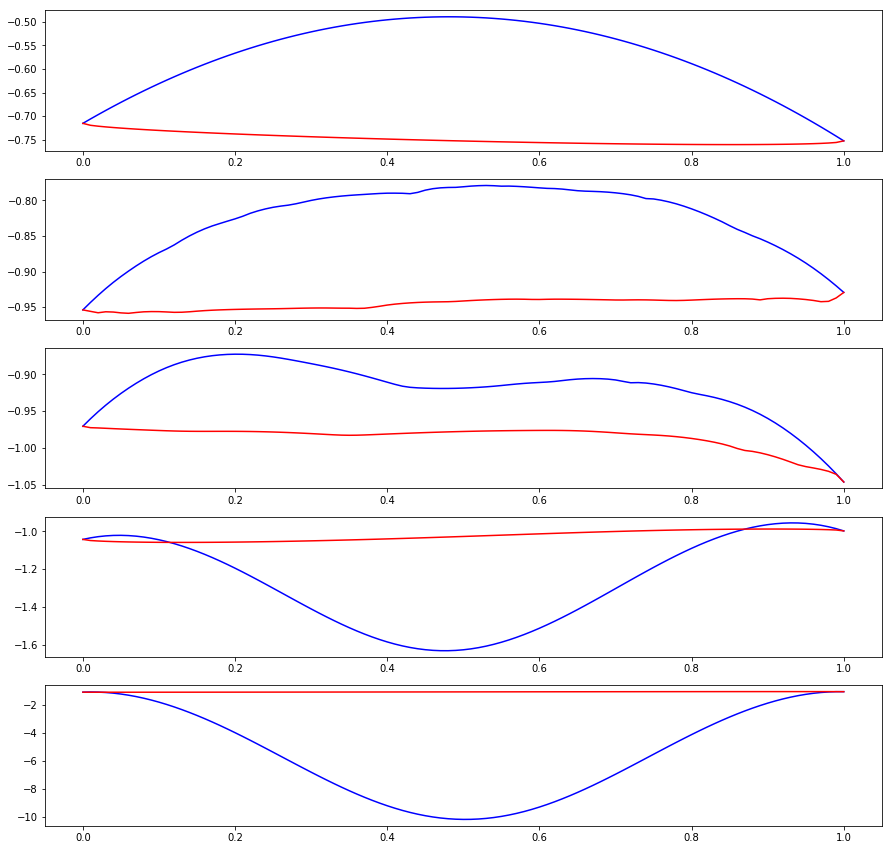

In [211]:
D = [1, 2, 3, 10, 100]

fig, axs = plt.subplots(5, figsize=(15,15))

for i, d in enumerate(D):
    sample_1 = np.random.randn(1000, d)
    sample_2 = np.random.randn(1000, d)

    avg_ll_norm = np.zeros(101, dtype=np.float64)

    for j, alpha in enumerate(np.linspace(0, 1, num=101)):

        norm_linear = [norm(lin_interp(alpha, x1, x2)) 
                       for x1, x2 in zip(sample_1, sample_2)]
        norm_polar = [norm(polar_interp(alpha, x1, x2)) 
                      for x1, x2 in zip(sample_1, sample_2)]
        
        avg_ll_linear[j] = np.mean(np.log([chi.pdf(x, df=d) for x in norm_linear]))
        avg_ll_polar[j] = np.mean(np.log([chi.pdf(x, df=d) for x in norm_polar]))
            
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_linear, color='b')
    axs[i].plot(np.linspace(0, 1, num=101), avg_ll_polar, color='r')

**How does the log-likelihood along the linear interpolation compare to the log-likelihood of the true samples (endpoints)?**